In [62]:
%matplotlib inline
from __future__ import division, print_function
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np

# extract mnist data

In [2]:
mnist_dir = '../dat'
dat = read_data_sets(mnist_dir)

Extracting ../dat/train-images-idx3-ubyte.gz
Extracting ../dat/train-labels-idx1-ubyte.gz
Extracting ../dat/t10k-images-idx3-ubyte.gz
Extracting ../dat/t10k-labels-idx1-ubyte.gz


In [3]:
# change to familiar variable names
Xtr_all = dat.train.images
ytr_all = dat.train.labels
Xval = dat.validation.images
yval = dat.validation.labels

In [30]:
sss = StratifiedShuffleSplit(ytr_all,train_size=100,n_iter=1)
i_tr, i_unlab = [i for i in sss][0] #indices for labelled and unlabelled training examples

# test knn with and without pca

In [13]:
# performance with 100 training examples
knn = KNeighborsClassifier()
knn.fit(Xtr_all[i_tr],ytr_all[i_tr])
knn_100_score = knn.score(Xval,yval)
knn_100_score

0.65100000000000002

In [24]:
#performance with all training examples (takes 4 mins on my box)
#knn.fit(Xtr_all,ytr_all)
#full_knn_score = knn.score(Xval,yval)
#full_knn_score

0.9738

In [6]:
pca = PCA(n_components = .60)
XTtr_all = pca.fit_transform(Xtr_all)
XTval = pca.transform(Xval)

In [78]:
Xtr_all.shape, XTtr_all.shape

((55000, 784), (55000, 2))

In [19]:
knn.fit(XTtr_all[i_tr],ytr_all[i_tr])
knn_100_T_score = knn.score(XTval,yval)
knn_100_T_score

0.69440000000000002

<Container object of 3 artists>

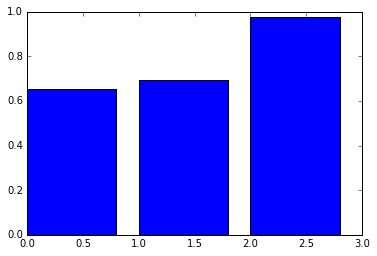

In [18]:
plt.bar(range(3),(knn_100_score, knn_100_T_score, full_knn_score))

In [20]:
from sklearn.linear_model import LogisticRegression

# test logistic regression with and without pca

In [31]:
lr = LogisticRegression()
lr.fit(Xtr_all[i_tr],ytr_all[i_tr])
lr_100_score = lr.score(Xval,yval)
lr_100_score

0.746

In [32]:
for variance in [.6,.8,.9,.95]:
    pca = PCA(n_components = variance)
    XTtr_all = pca.fit_transform(Xtr_all)
    XTval = pca.transform(Xval)
    lr = LogisticRegression()
    lr.fit(XTtr_all[i_tr],ytr_all[i_tr])
    lr_100_T_score = lr.score(XTval,yval)
    print(lr_100_T_score)

0.7186
0.7304
0.7252
0.725


In [33]:
lr = LogisticRegression()
lr.fit(Xtr_all,ytr_all)
lr_full_T_score = lr.score(Xval,yval)
lr_full_T_score

0.92100000000000004

# how hard does the classification task look in 2d after pca?

In [34]:
pca = PCA(n_components=2)
XTtr_all = pca.fit_transform(Xtr_all)

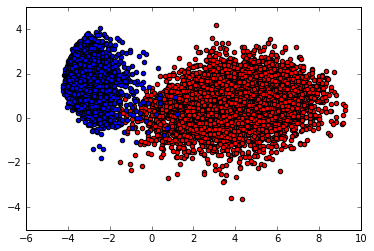

In [44]:
plt.scatter(XTtr_all[ytr_all==0,0],XTtr_all[ytr_all==0,1],c='r')
plt.scatter(XTtr_all[ytr_all==1,0],XTtr_all[ytr_all==1,1],c='b')

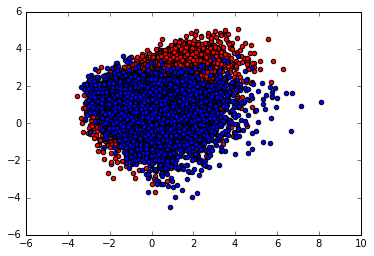

In [42]:
plt.scatter(XTtr_all[ytr_all==3,0],XTtr_all[ytr_all==3,1],c='r')
plt.scatter(XTtr_all[ytr_all==8,0],XTtr_all[ytr_all==8,1],c='b')

...looks like it depends greatly on the digit

# if there are only 2 digits, how well does knn do?

In [67]:
yval==0|1

array([False, False, False, ..., False,  True, False], dtype=bool)

In [91]:
zeros_and_ones = (ytr_all==0) | (ytr_all==1)
Xtr_all_zo = Xtr_all[zeros_and_ones]
ytr_all_zo = ytr_all[zeros_and_ones]
zeros_and_ones_val = (yval==0) | (yval==1)
Xval_zo = Xval[zeros_and_ones_val]
yval_zo = yval[zeros_and_ones_val]
sss = StratifiedShuffleSplit(ytr_all_zo,train_size=100,n_iter=1)
i_tr_zo, i_unlab_zo = [i for i in sss][0] #indices for labelled and unlabelled training examples

In [92]:
knn = KNeighborsClassifier()
knn.fit(Xtr_all_zo[i_tr_zo],ytr_all_zo[i_tr_zo])
knn_100_score = knn.score(Xval_zo,yval_zo)
knn_100_score

0.99232245681381959

In [93]:
pca = PCA(n_components = .60)
XTtr_all_zo = pca.fit_transform(Xtr_all_zo)
XTval_zo = pca.transform(Xval_zo)

In [94]:
knn.fit(XTtr_all_zo[i_tr_zo],ytr_all_zo[i_tr_zo])
knn_100_T_score = knn.score(XTval_zo,yval_zo)
knn_100_T_score

0.99712092130518237

In [95]:
knn.fit(Xtr_all_zo,ytr_all_zo)
full_knn_score = knn.score(Xval_zo,yval_zo)
full_knn_score

0.99904030710172742

looks like the advantages of SSL are accentuated with a simpler problem

# Can we make label propagation work in the simple zeros and ones case?

[Raghavan, Usha Nandini, Réka Albert, and Soundar Kumara. "Near linear time algorithm to detect community structures in large-scale networks." Physical review E 76.3 (2007): 036106.](http://arxiv.org/abs/0709.2938)

In [97]:
# to remove any variable confusion
del(Xval, yval, ytr_all, Xtr_all,i_tr, i_unlab, XTtr_all, XTval)

In [96]:
new_labels = np.zeros_like(i_unlab_zo)
for j, i in enumerate(i_tr_zo):
    new_labels[j] = 

array([2, 1, 4, 0, 3])

In [237]:
def nearest_neighbour_indices(data, probe,n):
    dists = ((data-probe)**2).sum(axis=1)
    nearest_indices = np.argpartition(dists,n)[:n]
    return(nearest_indices)

In [238]:
def propagated_label(X, y, unlabelled_example, n):
    if len(X)!=len(y):
        raise ValueError('X and y have sizes {}, {}. their lengths must be the same'.format(X.shape,y.shape))
    nearest_indices = nearest_neighbour_indices(X, unlabelled_example,n)
    nearest_labels = y[nearest_indices]
    majority_label = np.bincount(nearest_labels.astype(int)).argmax()
    return majority_label

In [226]:
propagated_label(Xtr_all_zo[i_tr_zo], ytr_all_zo[i_tr_zo], Xtr_all_zo[i_unlab_zo][3],9)

1

In [227]:
def propagate_labels(Xtr, ytr, Xunlab, n):
    new_labels = np.zeros(Xunlab.shape[0])
    reordering = np.random.permutation(Xunlab.shape[0])
    Xunlab_reord = Xunlab[reordering]
    for i, img in enumerate(Xunlab_reord):
        labelled = np.vstack((Xtr,Xunlab_reord[:i]))
        labels = np.hstack((ytr,new_labels[:i]))
        new_labels[i] = propagated_label(labelled, labels, Xunlab_reord[i], 9)
    new_labels = new_labels[np.argsort(reordering)]
    return (new_labels)

In [229]:
new_labels = propagate_labels(Xtr_all_zo[i_tr_zo], ytr_all_zo[i_tr_zo], Xtr_all_zo[i_unlab_zo],9)

In [236]:
(ytr_all_zo[i_unlab_zo]==new_labels).mean()

0.99484092863284612

In [244]:
knn.fit(Xtr_all_zo[i_tr_zo], ytr_all_zo[i_tr_zo])
knn.score(Xtr_all_zo[i_unlab_zo],ytr_all_zo[i_unlab_zo])

0.98968185726569213

In [245]:
knn.fit(Xtr_all_zo[i_tr_zo], ytr_all_zo[i_tr_zo])
knn.score(Xval_zo, yval_zo)

0.99232245681381959

In [251]:
X_consolidated = np.vstack((Xtr_all_zo[i_tr_zo],Xtr_all_zo[i_unlab_zo]))
y_consolidated = np.hstack((ytr_all_zo[i_tr_zo],new_labels))
knn.fit(X_consolidated, y_consolidated)
knn.score(Xval_zo, yval_zo)

0.99904030710172742

yes!